In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [75]:
check = np.genfromtxt('zpt_flcs_0605.dat',names=True)

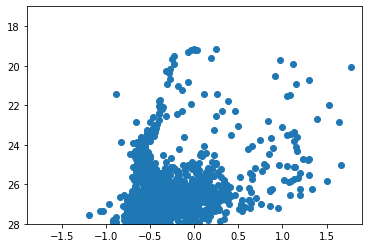

In [76]:
fig,ax = plt.subplots()

ax.scatter(check['magZPT_f606w']-check['magZPT_f814w'],check['magZPT_f814w'])
ax.set_ylim(28,17)
ax.set_xlim(-1.9,1.9)

plt.show()

In [65]:
f606w = np.genfromtxt('flcs_w_drcMAGS_f606w_magCuts.dat',names=True)
f814w = np.genfromtxt('flcs_w_drcMAGS_f814w_magCuts.dat',names=True)

In [66]:
drc_f606w = np.genfromtxt('all_drc_f606w_matched_magCuts.dat',names=True)
drc_f814w = np.genfromtxt('all_drc_f814w_matched_magCuts.dat',names=True)

In [5]:
lit_all = np.genfromtxt('flc_w_drc_trans_all.dat',names=True)

In [6]:
flc_orig = np.genfromtxt('../hor1dir6pix/HORI_pix_2212_d6_dist.dat',names=True)

In [7]:
nov = np.genfromtxt('../magsWerrs0811/HORI_final_0612.dat',names=True)

In [8]:
psf = np.genfromtxt('../elena_cats/HOROLOGIUM_CF.1.PSF.CAT',names=True)

In [9]:
drc_dir = '/Users/hr8jz/Box Sync/Research/source_lists/june13/'
drc_orig=np.genfromtxt(drc_dir + 'HOROLOGIUM-I_sfErr.dat',names=True)

In [10]:
flc_no_zpt = np.genfromtxt('HORI_comb2804.dat',names=True)

In [67]:
color = f814w['mean_f606w']-f814w['mean_f814w']
c_idx = np.logical_and(np.logical_and(color>-1.0,color<0),\
    np.logical_and(f814w['mean_f814w']>22,f814w['mean_f814w']<25.5))

In [68]:
flcA_diff_arr_606 = f814w['magDRC_f606w'][c_idx]-f814w['mean_f606w'][c_idx]

In [69]:
flcA_diff_arr_814 = f814w['magDRC_f814w'][c_idx]-f814w['mean_f814w'][c_idx]

In [70]:
magA_606_corr = np.nanmean(flcA_diff_arr_606)
magA_814_corr = np.nanmean(flcA_diff_arr_814)

In [71]:
print(magA_606_corr)

0.7549400000000013


In [72]:
print(magA_814_corr)

0.63498


In [73]:
col_corr = magA_606_corr-magA_814_corr
print(col_corr)

0.11996000000000129


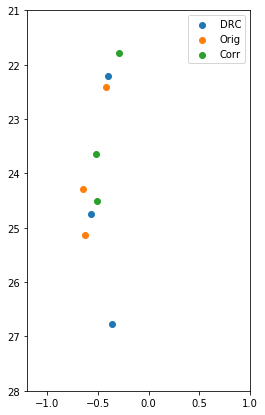

In [74]:
fig,ax = plt.subplots(figsize=(4,7))

ax.scatter(f814w['magDRC_f606w'][c_idx]-f814w['magDRC_f814w'][c_idx],f814w['magDRC_f814w'][c_idx],label='DRC')

ax.scatter(f814w['mean_f606w'][c_idx]-f814w['mean_f814w'][c_idx],f814w['mean_f814w'][c_idx],label='Orig')
ax.scatter(f814w['mean_f606w'][c_idx]-f814w['mean_f814w'][c_idx]+col_corr,\
           f814w['mean_f814w'][c_idx]-magA_814_corr,label='Corr')

ax.set_ylim(28,21)
ax.set_xlim(-1.2,1.)
ax.legend()

plt.show()

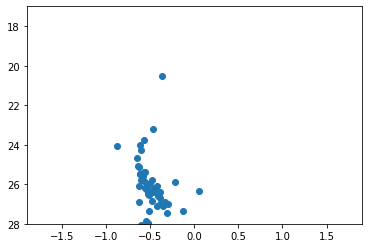

In [107]:
fig,ax = plt.subplots()

ax.scatter(f606w['mean_f606w']-f606w['mean_f814w'],f606w['mean_f814w'])
ax.set_ylim(28,17)
ax.set_xlim(-1.9,1.9)

plt.show()

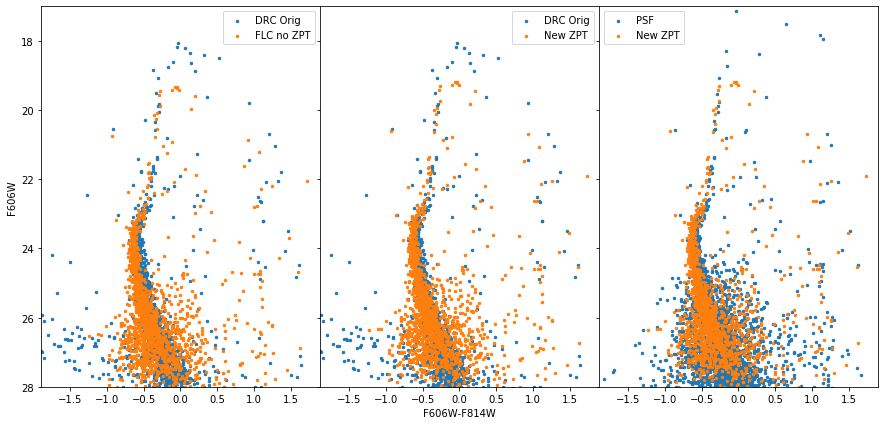

In [103]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_v'],label='DRC Orig',s=6)
ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w'],flc_no_zpt['mean_f606w'],label='FLC no ZPT',s=6)
# ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w']+col_corr,flc_no_zpt['mean_f606w']+magA_606_corr,label='New ZPT',s=6)

# ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)


ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_v'],label='DRC Orig',s=6)
ax2.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w']-col_corr,flc_no_zpt['mean_f606w']+magA_606_corr,label='New ZPT',s=6)
# ax2.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=6)
ax3.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w']-col_corr,flc_no_zpt['mean_f606w']+magA_606_corr,label='New ZPT',s=6)
# ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')

plt.subplots_adjust(wspace=0)
plt.show()

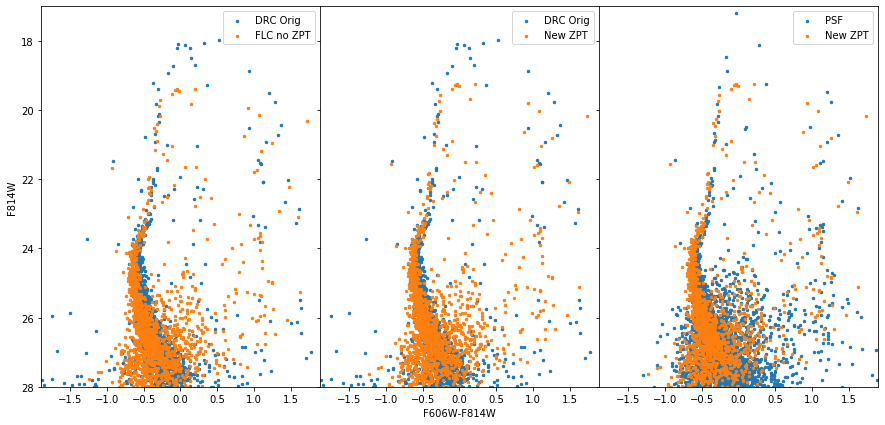

In [104]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_i'],label='DRC Orig',s=6)
ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w'],flc_no_zpt['mean_f814w'],label='FLC no ZPT',s=6)
# ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w']+col_corr,flc_no_zpt['mean_f606w']+magA_606_corr,label='New ZPT',s=6)

# ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)


ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_i'],label='DRC Orig',s=6)
ax2.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w']-col_corr,flc_no_zpt['mean_f814w']+magA_814_corr,label='New ZPT',s=6)
# ax2.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m814c'],label='PSF',s=6)
ax3.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w']-col_corr,flc_no_zpt['mean_f814w']+magA_814_corr,label='New ZPT',s=6)
# ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F814W')

plt.subplots_adjust(wspace=0)
plt.show()

In [14]:
mag1_814_corr = np.nanmean(flc1_814_sc[0])
mag2_814_corr = np.nanmean(flc2_814_sc[0])
mag3_814_corr = np.nanmean(flc3_814_sc[0])
mag4_814_corr = np.nanmean(flc4_814_sc[0])

In [15]:
mag1_606_corr_arr = f606w['mag1_f606w'] + mag1_606_corr
mag2_606_corr_arr = f606w['mag2_f606w'] + mag2_606_corr
mag3_606_corr_arr = f606w['mag3_f606w'] + mag3_606_corr
mag4_606_corr_arr = f606w['mag4_f606w'] + mag4_606_corr

In [16]:
mag1_814_corr_arr = f814w['mag1_f814w'] + mag1_814_corr
mag2_814_corr_arr = f814w['mag2_f814w'] + mag2_814_corr
mag3_814_corr_arr = f814w['mag3_f814w'] + mag3_814_corr
mag4_814_corr_arr = f814w['mag4_f814w'] + mag4_814_corr

In [17]:
mag1_606_corr_all = lit_all['mag1_f606w'] + mag1_606_corr
mag2_606_corr_all = lit_all['mag2_f606w'] + mag2_606_corr
mag3_606_corr_all = lit_all['mag3_f606w'] + mag3_606_corr
mag4_606_corr_all = lit_all['mag4_f606w'] + mag4_606_corr

mag1_814_corr_all = lit_all['mag1_f814w'] + mag1_814_corr
mag2_814_corr_all = lit_all['mag2_f814w'] + mag2_814_corr
mag3_814_corr_all = lit_all['mag3_f814w'] + mag3_814_corr
mag4_814_corr_all = lit_all['mag4_f814w'] + mag4_814_corr

In [18]:
sc_mean_606_all = np.empty((len(lit_all),1))
std_606_all = np.empty((len(lit_all),1))
for ss in range(len(lit_all)):
    temp_arr = np.array([mag1_606_corr_all[ss],mag2_606_corr_all[ss],\
                                           mag3_606_corr_all[ss],mag4_606_corr_all[ss]])
    sc_mean_606_all[ss] = np.nanmean(stats.sigmaclip(temp_arr,2.,2.)[0])
    std_606_all[ss] = np.std(stats.sigmaclip(temp_arr,2.,2.)[0])
sc_mean_606_all=sc_mean_606_all.flatten()
std_606_all=std_606_all.flatten()

sc_mean_814_all = np.empty((len(lit_all),1))
std_814_all = np.empty((len(lit_all),1))
for ss in range(len(lit_all)):
    temp_arr = np.array([mag1_814_corr_all[ss],mag2_814_corr_all[ss],\
                                           mag3_814_corr_all[ss],mag4_814_corr_all[ss]])
    sc_mean_814_all[ss] = np.nanmean(stats.sigmaclip(temp_arr,2.,2.)[0])
    std_814_all[ss] = np.std(stats.sigmaclip(temp_arr,2.,2.)[0])
sc_mean_814_all=sc_mean_814_all.flatten()
std_814_all=std_814_all.flatten()

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3059: RuntimeWarning: invalid value encountered in greater_equal
  c = c[(c >= critlower) & (c <= critupper)]
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3059: RuntimeWarning: invalid value encountered in less_equal
  c = c[(c >= critlower) & (c <= critupper)]
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3055: RuntimeWarning: Mean of empty slice.

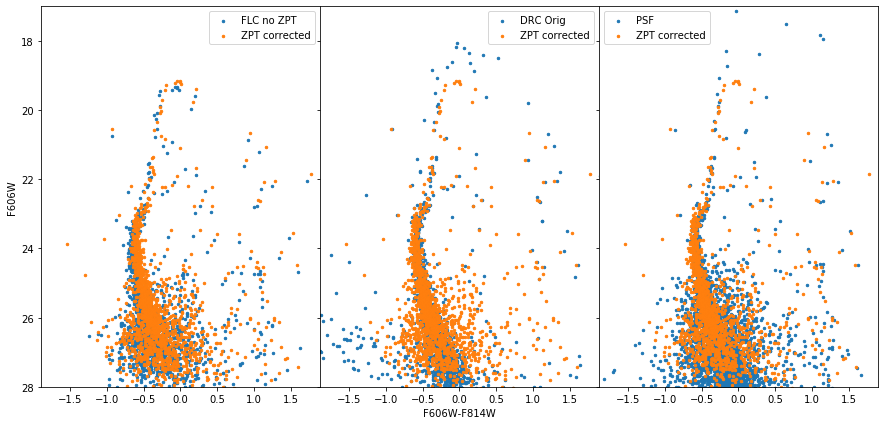

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w'],flc_no_zpt['mean_f606w'],label='FLC no ZPT',s=6)
ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_v'],label='DRC Orig',s=6)
ax2.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=6)
ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')

plt.subplots_adjust(wspace=0)
plt.show()

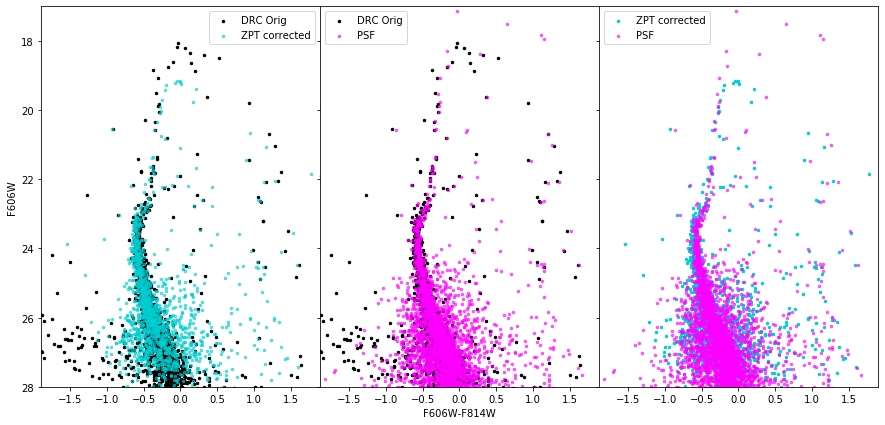

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)

ax1.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_v'],label='DRC Orig',s=6,color='black')
ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6,color='darkturquoise',alpha=0.6)
# ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_v'],label='DRC Orig',s=6,color='black')
ax2.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=6,color='magenta',alpha=0.6)

ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6,color='darkturquoise')
ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=6,color='magenta',alpha=0.6)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')

plt.subplots_adjust(wspace=0)
plt.show()

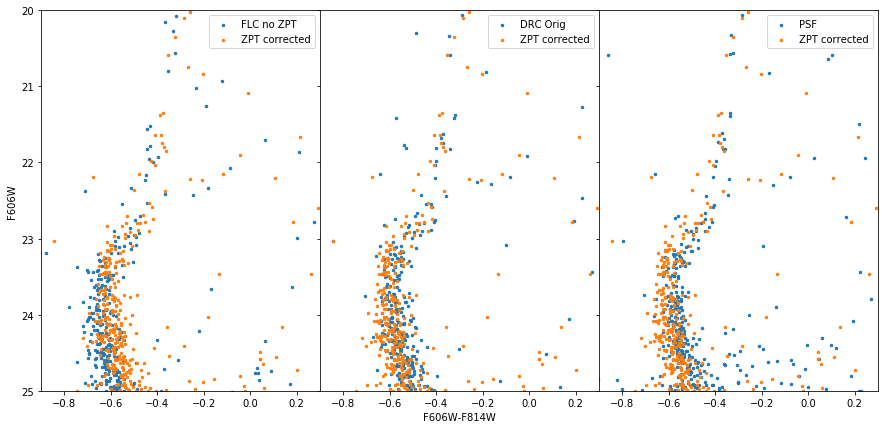

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w'],flc_no_zpt['mean_f606w'],label='FLC no ZPT',s=6)
ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_v'],label='DRC Orig',s=6)
ax2.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=6)
ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax1.set_ylim(25,20)
ax1.set_xlim(-0.9,0.3)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')

plt.subplots_adjust(wspace=0)
plt.show()

In [81]:
nov.dtype.names

('RA_f606w',
 'DEC_f606w',
 'flux_f606w',
 'c_star_f606w',
 'xr_1_f606w',
 'yr_1_f606w',
 'mag1_f606w',
 'xr_2_f606w',
 'yr_2_f606w',
 'mag2_f606w',
 'xr_3_f606w',
 'yr_3_f606w',
 'mag3_f606w',
 'xr_4_f606w',
 'yr_4_f606w',
 'mag4_f606w',
 'median_f606w',
 'stdev_f606w',
 'RA_f814w',
 'DEC_f814w',
 'flux_f814w',
 'c_star_f814w',
 'xr_1_f814w',
 'yr_1_f814w',
 'mag1_f814w',
 'xr_2_f814w',
 'yr_2_f814w',
 'mag2_f814w',
 'xr_3_f814w',
 'yr_3_f814w',
 'mag3_f814w',
 'xr_4_f814w',
 'yr_4_f814w',
 'mag4_f814w',
 'median_f814w',
 'stdev_f814w')

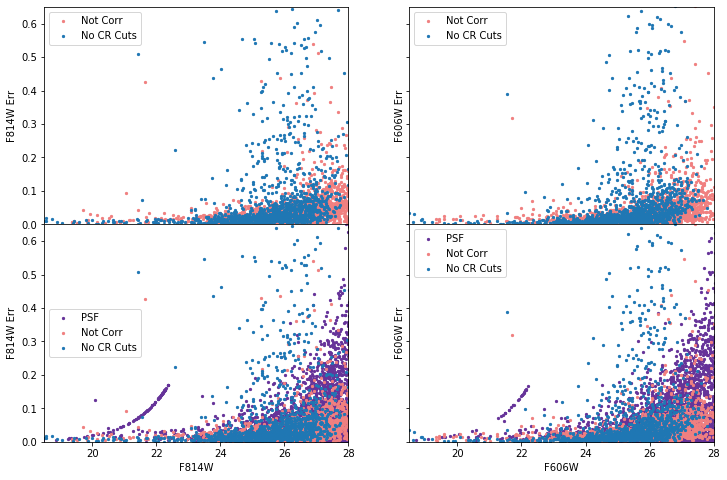

In [84]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8),sharex=True,sharey=True)

# ax1.scatter(sc_mean_814_all,std_814_all,s=5,label='ZPT Corr')
ax1.scatter(flc_no_zpt['mean_f814w'],flc_no_zpt['stdev_f814w'],s=5,label='Not Corr',color='lightcoral')
ax1.scatter(flc_orig['mean_f814w'],flc_orig['stdev_f814w'],s=5,label='No CR Cuts')
# ax1.scatter(nov['median_f814w'],nov['stdev_f814w'],s=5)

# ax2.scatter(sc_mean_606_all,std_606_all,s=5,label='ZPT Corr')
ax2.scatter(flc_no_zpt['mean_f606w'],flc_no_zpt['stdev_f606w'],s=5,label='Not Corr',color='lightcoral')
ax2.scatter(flc_orig['mean_f606w'],flc_orig['stdev_f606w'],s=5,label='No CR Cuts')
# ax2.scatter(nov['median_f606w'],nov['stdev_f606w'],s=5)

ax3.scatter(psf['m814c'],psf['s814'],s=5,color='rebeccapurple',label='PSF')
ax3.scatter(flc_no_zpt['mean_f814w'],flc_no_zpt['stdev_f814w'],s=5,label='Not Corr',color='lightcoral')
# ax3.scatter(sc_mean_814_all,std_814_all,s=5,label='ZPT Corr')
# ax3.scatter(drc_orig['magRaw_i'],drc_orig['magErr_i'],s=5)
ax3.scatter(flc_orig['mean_f814w'],flc_orig['stdev_f814w'],s=5,label='No CR Cuts')
# ax3.scatter(nov['median_f814w'],nov['stdev_f814w'],s=5)


ax4.scatter(psf['m606c'],psf['s606'],s=5,color='rebeccapurple',label='PSF')
ax4.scatter(flc_no_zpt['mean_f606w'],flc_no_zpt['stdev_f606w'],s=5,label='Not Corr',color='lightcoral')
# ax4.scatter(sc_mean_606_all,std_606_all,s=5,label='ZPT Corr')
# ax4.scatter(drc_orig['magRaw_v'],drc_orig['magErr_v'],s=5)
ax4.scatter(flc_orig['mean_f606w'],flc_orig['stdev_f606w'],s=5,label='No CR Cuts')
# ax4.scatter(nov['median_f606w'],nov['stdev_f606w'],s=5)


ax1.set_xlim(18.5,28)
ax1.set_ylim(0,0.65)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_ylabel('F814W Err')
ax2.set_ylabel('F606W Err')

ax3.set_ylabel('F814W Err')
ax4.set_ylabel('F606W Err')

ax1.set_xlabel('F814W')
ax2.set_xlabel('F606W')

ax3.set_xlabel('F814W')
ax4.set_xlabel('F606W')

plt.subplots_adjust(hspace=0)

plt.show()

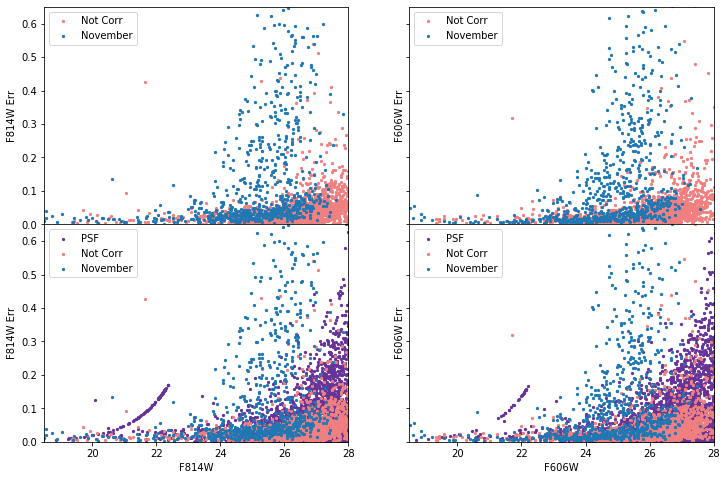

In [86]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8),sharex=True,sharey=True)

# ax1.scatter(sc_mean_814_all,std_814_all,s=5,label='ZPT Corr')
ax1.scatter(flc_no_zpt['mean_f814w'],flc_no_zpt['stdev_f814w'],s=5,label='Not Corr',color='lightcoral')
# ax1.scatter(flc_orig['mean_f814w'],flc_orig['stdev_f814w'],s=5,label='No CR Cuts')
ax1.scatter(nov['median_f814w'],nov['stdev_f814w'],s=5,label='November')

# ax2.scatter(sc_mean_606_all,std_606_all,s=5,label='ZPT Corr')
ax2.scatter(flc_no_zpt['mean_f606w'],flc_no_zpt['stdev_f606w'],s=5,label='Not Corr',color='lightcoral')
# ax2.scatter(flc_orig['mean_f606w'],flc_orig['stdev_f606w'],s=5,label='No CR Cuts')
ax2.scatter(nov['median_f606w'],nov['stdev_f606w'],s=5,label='November')

ax3.scatter(psf['m814c'],psf['s814'],s=5,color='rebeccapurple',label='PSF')
ax3.scatter(flc_no_zpt['mean_f814w'],flc_no_zpt['stdev_f814w'],s=5,label='Not Corr',color='lightcoral')
# ax3.scatter(sc_mean_814_all,std_814_all,s=5,label='ZPT Corr')
# ax3.scatter(drc_orig['magRaw_i'],drc_orig['magErr_i'],s=5)
# ax3.scatter(flc_orig['mean_f814w'],flc_orig['stdev_f814w'],s=5,label='No CR Cuts')
ax3.scatter(nov['median_f814w'],nov['stdev_f814w'],s=5,label='November')


ax4.scatter(psf['m606c'],psf['s606'],s=5,color='rebeccapurple',label='PSF')
ax4.scatter(flc_no_zpt['mean_f606w'],flc_no_zpt['stdev_f606w'],s=5,label='Not Corr',color='lightcoral')
# ax4.scatter(sc_mean_606_all,std_606_all,s=5,label='ZPT Corr')
# ax4.scatter(drc_orig['magRaw_v'],drc_orig['magErr_v'],s=5)
# ax4.scatter(flc_orig['mean_f606w'],flc_orig['stdev_f606w'],s=5,label='No CR Cuts')
ax4.scatter(nov['median_f606w'],nov['stdev_f606w'],s=5,label='November')


ax1.set_xlim(18.5,28)
ax1.set_ylim(0,0.65)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_ylabel('F814W Err')
ax2.set_ylabel('F606W Err')

ax3.set_ylabel('F814W Err')
ax4.set_ylabel('F606W Err')

ax1.set_xlabel('F814W')
ax2.set_xlabel('F606W')

ax3.set_xlabel('F814W')
ax4.set_xlabel('F606W')

plt.subplots_adjust(hspace=0)

plt.show()

In [23]:
idx = np.logical_and(flc_no_zpt['c_star_f606w']>0.8,flc_no_zpt['c_star_f814w']>0.8)

In [24]:
idx_d = np.logical_and(drc_orig['class_Star_v']>0.8,drc_orig['class_Star_i']>0.8)

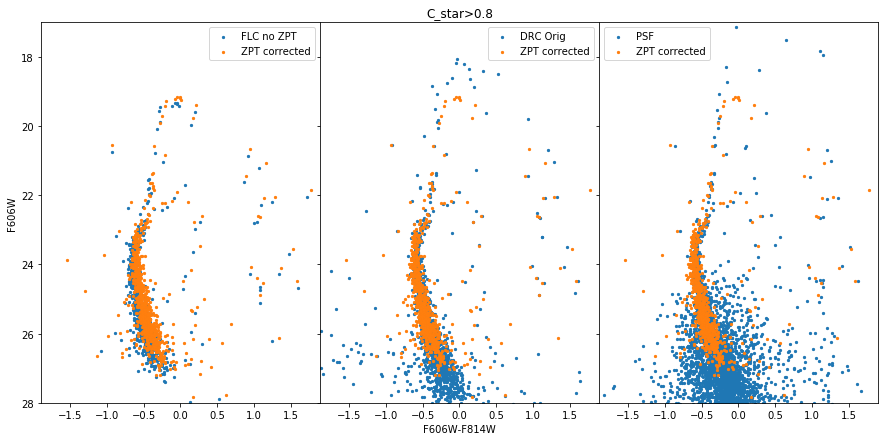

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(flc_no_zpt['mean_f606w'][idx]-flc_no_zpt['mean_f814w'][idx],\
            flc_no_zpt['mean_f606w'][idx],label='FLC no ZPT',s=5)
ax1.scatter(sc_mean_606_all[idx]-sc_mean_814_all[idx],sc_mean_606_all[idx],label='ZPT corrected',s=5)

ax2.scatter(drc_orig['magRaw_v'][idx_d]-drc_orig['magRaw_i'][idx_d],drc_orig['magRaw_v'][idx_d],label='DRC Orig',s=5)
ax2.scatter(sc_mean_606_all[idx]-sc_mean_814_all[idx],sc_mean_606_all[idx],label='ZPT corrected',s=5)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=5)
ax3.scatter(sc_mean_606_all[idx]-sc_mean_814_all[idx],sc_mean_606_all[idx],label='ZPT corrected',s=5)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')

ax2.set_title('C_star>0.8')

plt.subplots_adjust(wspace=0)
plt.show()

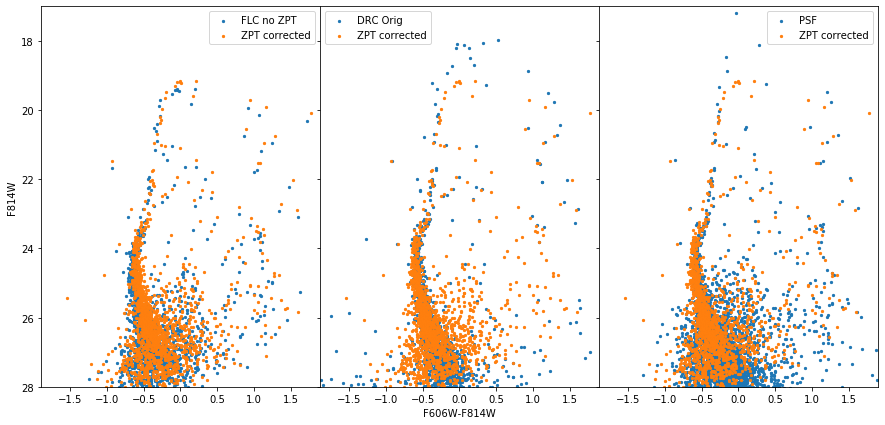

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(flc_no_zpt['mean_f606w']-flc_no_zpt['mean_f814w'],flc_no_zpt['mean_f814w'],label='FLC no ZPT',s=5)
ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_814_all,label='ZPT corrected',s=5)

ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_i'],label='DRC Orig',s=5)
ax2.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_814_all,label='ZPT corrected',s=5)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m814c'],label='PSF',s=5)
ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_814_all,label='ZPT corrected',s=5)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F814W')

plt.subplots_adjust(wspace=0)
plt.show()

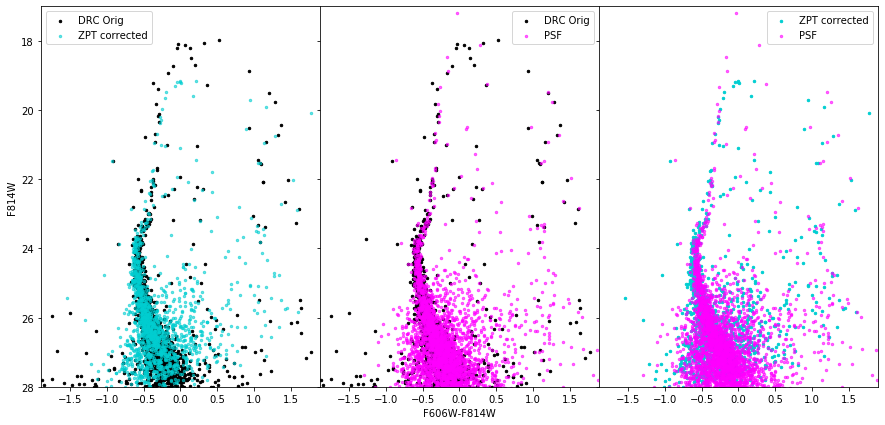

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)

ax1.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_i'],label='DRC Orig',s=6,color='black')
ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_814_all,label='ZPT corrected',s=6,color='darkturquoise',alpha=0.6)
# ax1.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_606_all,label='ZPT corrected',s=6)

ax2.scatter(drc_orig['magRaw_v']-drc_orig['magRaw_i'],drc_orig['magRaw_i'],label='DRC Orig',s=6,color='black')
ax2.scatter(psf['m606c']-psf['m814c'],psf['m814c'],label='PSF',s=6,color='magenta',alpha=0.6)

ax3.scatter(sc_mean_606_all-sc_mean_814_all,sc_mean_814_all,label='ZPT corrected',s=6,color='darkturquoise')
ax3.scatter(psf['m606c']-psf['m814c'],psf['m814c'],label='PSF',s=6,color='magenta',alpha=0.6)

ax1.set_ylim(28,17)
ax1.set_xlim(-1.9,1.9)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F814W')

plt.subplots_adjust(wspace=0)
plt.show()

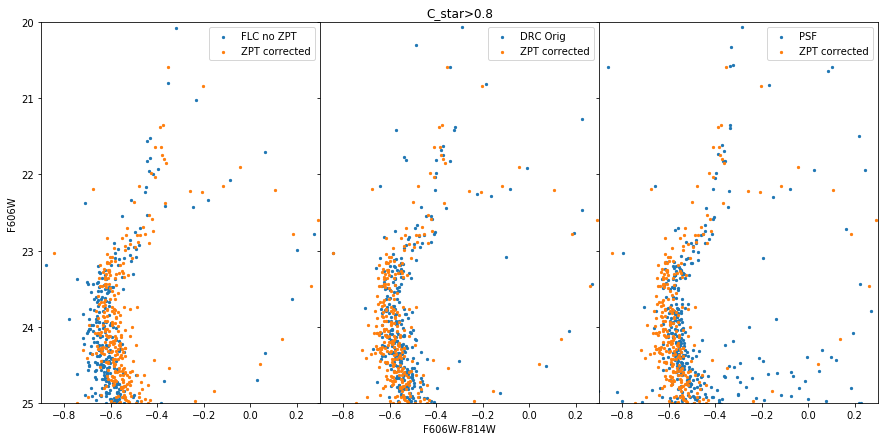

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharex=True,sharey=True)


ax1.scatter(flc_no_zpt['mean_f606w'][idx]-flc_no_zpt['mean_f814w'][idx],\
            flc_no_zpt['mean_f606w'][idx],label='FLC no ZPT',s=5)
ax1.scatter(sc_mean_606_all[idx]-sc_mean_814_all[idx],sc_mean_606_all[idx],label='ZPT corrected',s=5)

ax2.scatter(drc_orig['magRaw_v'][idx_d]-drc_orig['magRaw_i'][idx_d],drc_orig['magRaw_v'][idx_d],label='DRC Orig',s=5)
ax2.scatter(sc_mean_606_all[idx]-sc_mean_814_all[idx],sc_mean_606_all[idx],label='ZPT corrected',s=5)

ax3.scatter(psf['m606c']-psf['m814c'],psf['m606c'],label='PSF',s=5)
ax3.scatter(sc_mean_606_all[idx]-sc_mean_814_all[idx],sc_mean_606_all[idx],label='ZPT corrected',s=5)

ax1.set_ylim(25,20)
ax1.set_xlim(-0.9,0.3)

ax1.legend()
ax2.legend()
ax3.legend()

ax2.set_xlabel('F606W-F814W')
ax1.set_ylabel('F606W')

ax2.set_title('C_star>0.8')

plt.subplots_adjust(wspace=0)
plt.show()

In [29]:
mbins = np.arange(22.5, 26, 0.5)

In [30]:
colorD = f606w['magDRC_f606w']-f606w['magDRC_f814w']
colorC = sc_mean_606_all-sc_mean_814_all

dig_mD = np.digitize(f606w['magDRC_f606w'], mbins)
dig_mC = np.digitize(sc_mean_606_all, mbins)

In [38]:
colorO = flc_no_zpt['mean_f606w'] - flc_no_zpt['mean_f814w']
dig_mO = np.digitize(flc_no_zpt['mean_f606w'],mbins)

In [31]:
colorP = psf['m606c']-psf['m814c']
dig_mP = np.digitize(psf['m606c'], mbins)

In [39]:
col_meanD = np.zeros((len(mbins)-1))
col_meanC = np.zeros((len(mbins)-1))
col_meanP = np.zeros((len(mbins)-1))
col_meanO = np.zeros((len(mbins)-1))
for ii in range(1,len(mbins)):
    col_meanD[ii-1] = np.median(colorD[np.argwhere(dig_mD==ii)])
    col_meanC[ii-1] = np.median(colorC[np.argwhere(dig_mC==ii)])
    col_meanP[ii-1] = np.median(colorP[np.argwhere(dig_mP==ii)])
    col_meanO[ii-1] = np.median(colorO[np.argwhere(dig_mO==ii)])
    

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/hr8jz/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
bin_means = mbins[1:]
print(bin_means)

[23.  23.5 24.  24.5 25.  25.5]


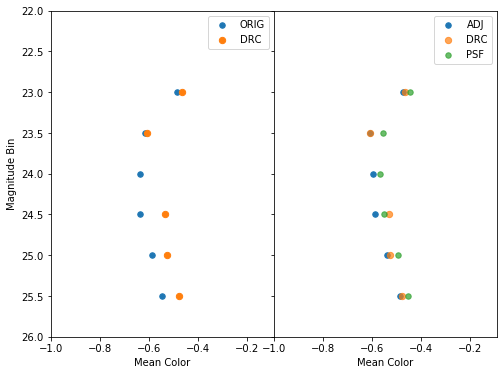

In [49]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(8,6),sharex=True,sharey=True)

ax1.scatter(col_meanO,bin_means,label='ORIG',s=30)
ax1.scatter(col_meanD,bin_means,label='DRC',alpha=1,s=40)

ax2.scatter(col_meanC,bin_means,label='ADJ',s=30)
ax2.scatter(col_meanD,bin_means,label='DRC',alpha=0.7,s=40)
ax2.scatter(col_meanP,bin_means,label='PSF',s=30,alpha=0.7)


ax1.legend()
ax2.legend()
ax1.set_xlabel('Mean Color')
ax2.set_xlabel('Mean Color')
ax1.set_ylabel('Magnitude Bin')
ax1.set_ylim(26,22)
ax1.set_xlim(-1.,-0.09)

plt.subplots_adjust(wspace=0)

plt.show()

In [35]:
diff = col_meanC - col_meanP

In [78]:
diffM = col_meanC - col_meanD

In [50]:
diff0 = col_meanO - col_meanP

In [55]:
diffD = col_meanD -col_meanP

In [100]:
diffL = col_meanD -col_meanC

In [36]:
# diff_s = col_meanC[1:] - col_meanP[1:]

In [101]:
# Mean difference between mine and Mattia's

print('Original Mean Diff:',np.mean(diff0))
print('Adjusted Mean Diff:',np.mean(diff))
print('DRC-PSF Diff:',np.nanmean(diffD))
print('ADJ-DRC Diff:',np.nanmean(diffM))
print('DRC-Orig Diff:',np.nanmean(diffL))

print('\n')

print('Original Median Diff:',np.median(diff0))
print('Adjusted Mean Diff:',np.median(diff))
print('DRC-PSF Diff:',np.nanmedian(diffD))
print('ADJ-DRC Diff:',np.nanmedian(diffM))
print('DRC-Orig Diff:',np.nanmedian(diffL))

# Mine is bluer by about 0.03

Original Mean Diff: -0.07297916666666726
Adjusted Mean Diff: -0.03786105096312061
DRC-PSF Diff: -0.021684000000000835
ADJ-DRC Diff: -0.01812830096311977
DRC-Orig Diff: 0.01812830096311977


Original Median Diff: -0.07799499999999959
Adjusted Mean Diff: -0.035814800963120064
DRC-PSF Diff: -0.02278000000000091
ADJ-DRC Diff: -0.00967730096311925
DRC-Orig Diff: 0.00967730096311925
